# Project 1: Basic Data Generation and Manipulation

### Submitted by: Prateek Kumar 

## Q1 - Visualizing the Multivariate Gaussian (Normal) Probability Density Function 

##### Importing the required packages 

In [1]:
import numpy as np                              # import numpy
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # a multivariate normal random variable
from mpl_toolkits.mplot3d import Axes3D         # plot 3D objects on a 2D matplotlib figure

##### Assigning the mean vector and covariance matrix to variables mu and cov 

In [2]:
mu = [1,1]                                      # mean vector
cov = [[2, -1], [-1, 1]]                        # covariance matrix

##### Create grid and multivariate normal

We have to show a contour plot and a surface plot of this PDF over the range [-5,5] in both dimensions

In [3]:
x = np.linspace(-5,5,100)                       # from range -5 to 5 we generate 100 evenly spaced samples for x
y = np.linspace(-5,5,100)                       # from range -5 to 5 we generate 100 evenly spaced samples for y
X, Y = np.meshgrid(x,y)                         # returns coordinate matrices from coordinate vectors.

##### Pack the x and y into 3-dimension

In [4]:
pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y            # assigning X and Y axis

##### Setting the interaction between x and y

In [5]:
Z = multivariate_normal(mu, cov)              # The Multivariate Gaussian distribution specified by mean and covariance matrix

##### Making the 3D plot

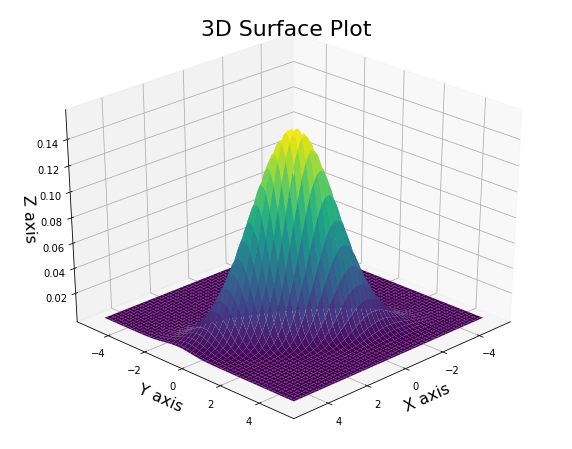

In [6]:
fig = plt.figure(figsize=(10,8))                               # creating a new matplotlib figure
ax = fig.gca(projection='3d')                                  # adding a new axes to it of type Axes3D
ax.plot_surface(X, Y, Z.pdf(pos),cmap='viridis',linewidth=0)   # plotting the surface plot
ax.set_xlabel('X axis', fontsize=16)                           # X-Axis
ax.set_ylabel('Y axis', fontsize=16)                           # Y-Axis
ax.set_zlabel('Z axis', fontsize=16)                           # Z-Axis
ax.view_init(30, 45)                                           # rotating the plot to get a better view
plt.title('3D Surface Plot', fontsize=22)                      # Title of the plot
plt.show()                                                     # displaying the plot

##### Making the contour plot 

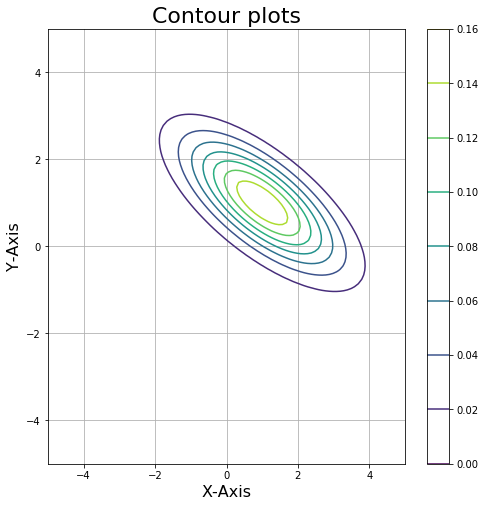

In [7]:
plt.figure(figsize=(8,8))                          # creating the figure and assigning the size
cp = plt.contour(X, Y, Z.pdf(pos))                 # creating the contour plot
plt.colorbar(cp)                                   # plotting the colorbar
plt.xlabel('X-Axis', fontsize=16)                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                  # Y-Axis
plt.title('Contour plots', fontsize=22)            # Title of the plot
plt.grid()                                         # displaying gridlines
plt.show()                                         # displaying the plot

## Q2 - Generate Synthetic Data for Classification 

##### Assigning mean and covariance to variables 

In [8]:
meanX = [0,0]                                                # assigning zero-mean to variable meanX
meanY = [1,1]                                                # second mean vector given in the question
covX = [[1, .1], [.1, 1]]                                    # first 100 observations covariance matrix
covY = [[1, -.1], [-.1, 1]]                                  # next 100 observations covariance matrix

##### Generating the 200 observations 

In [9]:
x = np.random.multivariate_normal(meanX, covX, size=(100,))  # Generating first 100 observations 
y = np.random.multivariate_normal(meanY, covY, size=(100,))  # Generating next 100 observations

##### Plotting all the 200 observations 

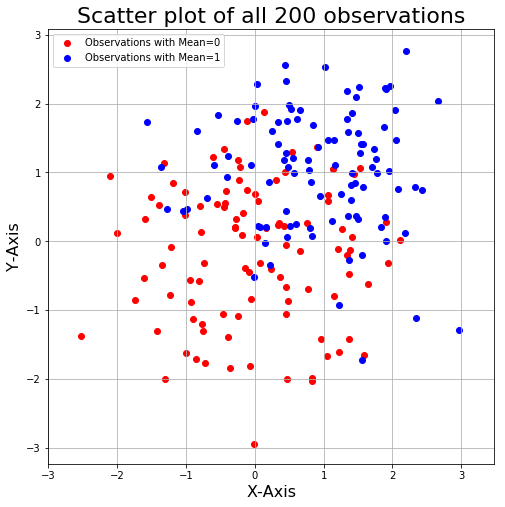

In [10]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x[:,0], x[:,1], c='r', marker='o', label='Observations with Mean=0')   # mean 0 scatter plot
plt.scatter(y[:,0], y[:,1], c='b', marker='o', label='Observations with Mean=1')   # mean 1 scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='upper left')                                                       # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Scatter plot of all 200 observations', fontsize=22)                     # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

## Q3 - Generate Synthetic Data for Regression 

##### Generating the data and adding noise

In [11]:
x = np.random.uniform(-5, 5, size=(100,)) # Generating 100 observations from a uniform distribution over the interval -5 to 5
y = (1/10)* x**3 + 3                # Generating 100 ground-truth (no noise) target values
noise = np.random.normal(0,1,100)   # Generating independently sampled zero-mean unit-variance Gaussian noise
y2 = y + noise                      # Adding noise to each target value

##### plotting both the Ground Truth data and noisy data 

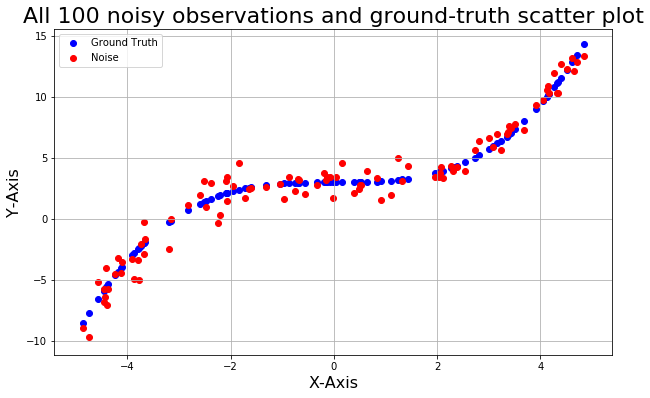

In [12]:
plt.figure(figsize=(10,6))                                                         # creating the figure and assigning the size
plt.scatter(x,y, c='b', marker='o', label='Ground Truth')                          # ground truth scatter plot
plt.scatter(x, y2, c='r', marker='o', label='Noise')                               # noisy scatter plot
plt.legend(loc='upper left')                                                       # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('All 100 noisy observations and ground-truth scatter plot', fontsize=22) # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

## Q4 - Standardizing Data 

##### Importing the StandardScaler package

In [13]:
from sklearn.preprocessing import StandardScaler      # Standardize features by removing the mean and scaling to unit variance

##### Assigning mean and covariance to variables 

In [14]:
mean = [2,5]                                          # mean vector
cov = [[1, -0.1], [-0.1, 1]]                          # covariance matrix

##### Generating the 10 observations 

In [15]:
x, y = np.random.multivariate_normal(mean, cov, 10).T # generating 10 observations from a 2-d normal distribution

##### Standardizing  the data

In [16]:
obs = np.array([x,y])                                 # stacking all the observations into a matrix
obs = obs.transpose()                                 # changing the dimension to 10 X 2
std_data = StandardScaler().fit_transform(obs)        # standardizing the data

In [17]:
std_x = [row[0] for row in std_data]                  # extracting the x values from standardized matrix
std_y = [row[1] for row in std_data]                  # extracting the y values from standardized matrix

##### Plotting both the original and standardized data 

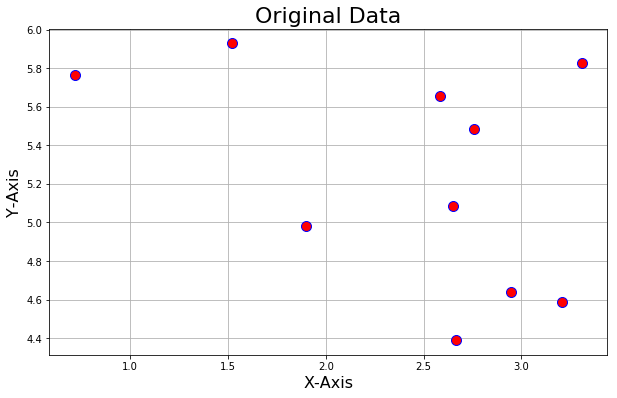

In [18]:
plt.figure(figsize=(10,6))                                                      # creating the figure and assigning the size
plt.plot(x, y,color='blue', linestyle='none', marker='o', markerfacecolor='red', markersize=10) # scatter plot of original data
plt.xlabel('X-Axis', fontsize=16)                                               # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                               # Y-Axis
plt.title('Original Data', fontsize=22)                                         # Title of the plot
plt.grid()                                                                      # displaying gridlines
plt.show()                                                                      # displaying the plot

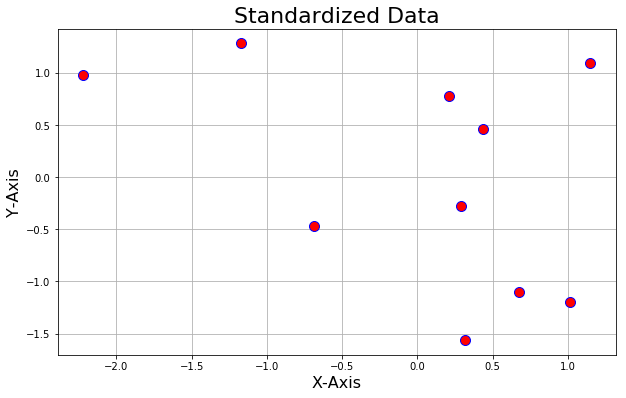

In [19]:
plt.figure(figsize=(10,6))                                                        # creating the figure and assigning the size
plt.plot(std_x, std_y, color='blue', linestyle='none', marker='o', markerfacecolor='red', markersize=10)# standardized data plot
plt.xlabel('X-Axis', fontsize=16)                                               # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                               # Y-Axis
plt.title('Standardized Data', fontsize=22)                                     # Title of the plot
plt.grid()                                                                      # displaying gridlines
plt.show()                                                                      # displaying the plot